In [ ]:
#load libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
# load the data sets, show the details of training set and test set
df_train = pd.read_csv('/content/sample_data/sales_train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')
item_categories = pd.read_csv('/content/sample_data/item_categories.csv')
items = pd.read_csv('/content/sample_data/items.csv')
shops = pd.read_csv('/content/sample_data/shops.csv')
sample_submission = pd.read_csv('/content/sample_data/sample_submission.csv')

print('Number of Training Samples = {}'.format(df_train.shape[0]))
print('Number of Test Samples = {}\n'.format(df_test.shape[0]))

print('Training X Shape = {}'.format(df_train.shape))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

print('----Index of Train set:----\n', df_train.columns)
print(df_train.info())
print('----Index of Test set:----\n', df_test.columns)


print('----Missing values of Train set:----\n', df_train.isnull().sum())
print('----Null values of Train set:----\n', df_train.isna().sum())

Number of Training Samples = 2935849
Number of Test Samples = 214200

Training X Shape = (2935849, 6)
Test X Shape = (214200, 3)
Test y Shape = 214200

----Index of Train set:----
 Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----Index of Test set:----
 Index(['ID', 'shop_id', 'item_id'], dtype='object')
----Missing values of Train set:----
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
----Null values of Train set:----
 date 

let's take a look at our training set and test set

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None


the date is object Dtype, let's convert it into datetime format

In [ ]:
# converting date object to datetime format
df_train['date'] = pd.to_datetime(df_train['date'],format = '%d.%m.%Y')
print('Min date from train set: %s' % df_train['date'].min().date())
print('Max date from train set: %s' % df_train['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-10-31


In [ ]:
# print min and max num assigned to the months
print('Min date_block_num from train set: %s' % df_train['date_block_num'].min())
print('Max date_block_num from train set: %s' % df_train['date_block_num'].max())

Min date_block_num from train set: 0
Max date_block_num from train set: 33


The train data is from January 2013 date_block_num 0 to October 2015 date_block_num 33. We are to use the sales record for the past 34 months to predict the 35th month which is November 2015 date_block_num 34.

In [ ]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
sample = df_train[(df_train.shop_id==25)&(df_train.item_id==2552)&(df_train.date_block_num==0)]

In [ ]:
sample

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


from the above sample, we can notice that the data is really spase, we don't have the daily sales of each item in each shop, usually, the sales of specific item in specific shop is like, if you count the number of item sold,the number will be really low in one month, maybe one or two, maybe 0. So if I count the sales of each product per day, many many data will be 0. In this case, I count the sales of each product per week, per month.

let's take a look at our training set

In [ ]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


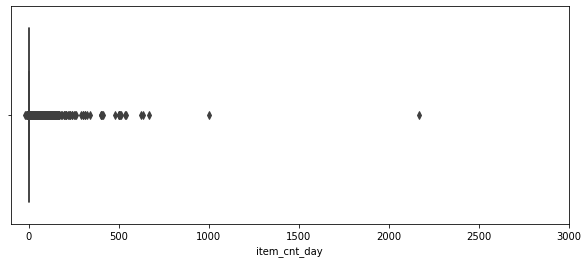

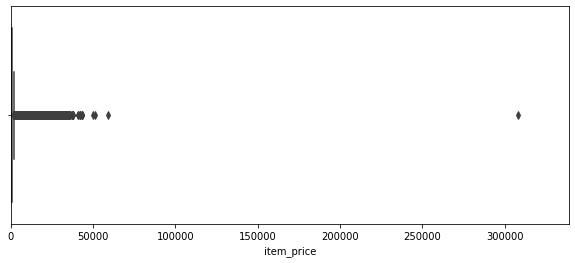

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(df_train.item_price.min(), df_train.item_price.max()*1.1)
sns.boxplot(x=df_train.item_price)

 we found negative values and outliers in item_price and item_cnt_day in our training set

# outlier fixing and negative values fixing

In [ ]:
df_train = df_train[df_train.item_price<100000]
df_train = df_train[df_train.item_cnt_day<1000]

In [ ]:
negative_entries = df_train[(df_train.item_price<0)]
negative_entries

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


for negative item_price, we change it into the mean value of the same product item in the same shop and in the same date_block_num

In [ ]:
neg_group = df_train[(df_train.shop_id==32)&(df_train.item_id==2973)&(df_train.date_block_num==4)&(df_train.item_price>0)]
neg_group

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484682,2013-05-23,4,32,2973,1249.0,1.0
484684,2013-05-06,4,32,2973,2499.0,1.0


In [ ]:
mean = df_train[(df_train.shop_id==32)&(df_train.item_id==2973)&(df_train.date_block_num==4)&(df_train.item_price>0)].item_price.mean()
df_train.loc[df_train.item_price<0, 'item_price'] = mean

In [ ]:
sample = df_train[(df_train.shop_id==25)&(df_train.item_id==2321)]

In [ ]:
sample

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
147,2013-01-20,0,25,2321,999.0,1.0
148,2013-01-23,0,25,2321,999.0,-1.0
149,2013-01-31,0,25,2321,999.0,1.0
408,2013-01-05,0,25,2321,999.0,1.0
155098,2013-02-07,1,25,2321,999.0,1.0
155099,2013-02-25,1,25,2321,1099.0,1.0
324402,2013-03-21,2,25,2321,1099.0,1.0
324453,2013-03-19,2,25,2321,989.0,1.0
353997,2013-04-26,3,25,2321,1099.0,1.0
584374,2013-06-18,5,25,2321,698.0,1.0


for negative item_cnt_day, we change it into 0

In [ ]:
negative_cnt = df_train[(df_train.item_cnt_day<0)]
negative_cnt

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [ ]:
df_train.loc[df_train.item_cnt_day<0, 'item_cnt_day'] = 0

#total sales monthly 

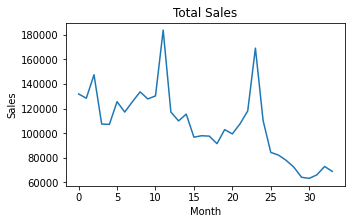

In [ ]:
ts_monthly=df_train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts_monthly.astype('float')
plt.figure(figsize=(5,3))
plt.title('Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(ts_monthly);

# decompose ts and ACF plot function

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

def decompose(ts):
  decompose_result = seasonal_decompose(ts, freq = 7, model="additive")
  trend = decompose_result.trend
  seasonal = decompose_result.seasonal 
  residual = decompose_result.resid 

  decompose_result.plot()



def ACF(ts): 
  ACF = acf(ts) 
  sm.graphics.tsa.plot_acf(ACF)

In [ ]:
ts_monthly = ts_monthly.reset_index()

In [ ]:
ts_monthly.columns = ['month','item_cnt_month']

In [ ]:
ts_monthly

,month,item_cnt_month
0,0,131850.0
1,1,128382.0
2,2,147438.0
3,3,107439.0
4,4,107148.0
5,5,125583.0
6,6,117165.0
7,7,125586.0
8,8,133551.0
9,9,127815.0


# decomposition of monthly sale

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


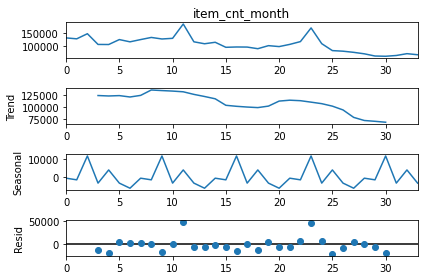

In [ ]:
decompose(ts_monthly['item_cnt_month'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


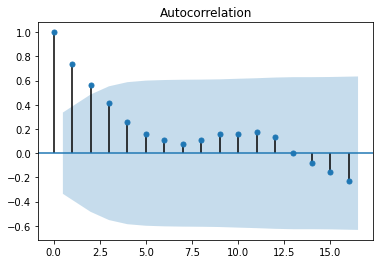

In [ ]:
def ACF(ts): 
  ACF = acf(ts) 
  sm.graphics.tsa.plot_acf(ACF)
ACF(ts_monthly['item_cnt_month'])

# Difference data to make data stationary on mean (remove trend)

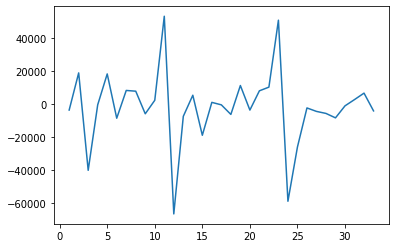

In [ ]:
ts_monthly['item_cnt_month_diff'] = ts_monthly['item_cnt_month'] - ts_monthly['item_cnt_month'].shift(1)
ts_monthly['item_cnt_month_diff'].dropna().plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


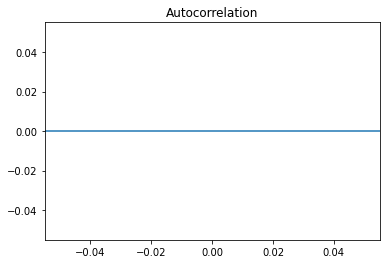

In [ ]:
ACF(ts_monthly['item_cnt_month_diff'])

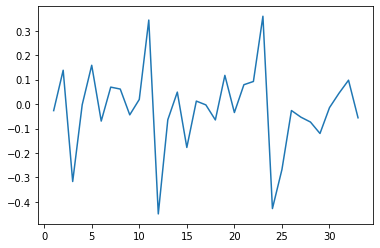

In [ ]:
ts_monthly['item_cnt_month_log'] = np.log(ts_monthly['item_cnt_month'])

ts_monthly['item_cnt_month_log_diff'] = ts_monthly['item_cnt_month_log'] - ts_monthly['item_cnt_month_log'].shift(1)
ts_monthly['item_cnt_month_log_diff'].dropna().plot()

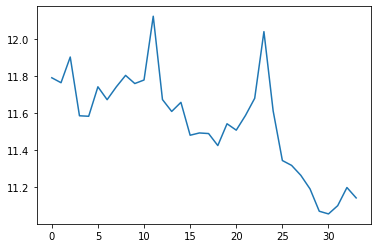

In [ ]:
ts_monthly['item_cnt_month_log'].dropna().plot()

# check stationary on monthly sales

In [ ]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(ts_monthly['item_cnt_month'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  0.14971807443343815  if above 0.05, data is not stationary


In [ ]:
! pip install pmdarima

In [ ]:
ts_monthly['month']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
Name: month, dtype: int64

# apply Arima model to monthly sales

In [ ]:
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
from pmdarima.arima import auto_arima
arima_model = auto_arima(ts_monthly['item_cnt_month'][:24], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=221.539, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=218.022, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=214.978, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=215.292, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=219.965, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=216.978, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=216.978, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=216.183, Time=0.07 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=218.978, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=213.010, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=215.010, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=214.358, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=216.358, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             

our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. 

In [ ]:
size = 24
X_train, X_test = ts_monthly[:size], ts_monthly[size:len(ts_monthly)]
#Best model:  ARIMA(0,1,0)(0,1,0)[12]    
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['item_cnt_month'],  
                order = (0, 1, 0),  
                seasonal_order =(1, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     item_cnt_month   No. Observations:                   24
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -116.177
Date:                            Tue, 08 Dec 2020   AIC                            236.355
Time:                                    22:23:13   BIC                            237.151
Sample:                                         0   HQIC                           235.853
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3187      0.144     -2.219      0.026      -0.600      -0.037
sigma2      1.283e+08   5.17e-11   2.48e+18      0.000    1.28e+08    1.28e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.89   Prob(JB):                         0.67
Heteroskedasticity (H):               3.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.27   Kurtosis:                         1.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
X_train

,month,item_cnt_month,item_cnt_month_diff,item_cnt_month_log,item_cnt_month_log_diff
0,0,131850.0,NaN,11.789420,NaN
1,1,128382.0,-3468.0,11.762765,-0.026655
2,2,147438.0,19056.0,11.901163,0.138398
3,3,107439.0,-39999.0,11.584679,-0.316485
4,4,107148.0,-291.0,11.581966,-0.002712
5,5,125583.0,18435.0,11.740722,0.158756
6,6,117165.0,-8418.0,11.671338,-0.069384
7,7,125586.0,8421.0,11.740746,0.069408
8,8,133551.0,7965.0,11.802239,0.061493
9,9,127815.0,-5736.0,11.758339,-0.043900


In [ ]:
# fit the best model we got.
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 
train_prediction

0          0.000000
1     131850.000000
2     128382.000000
3     147438.000000
4     107439.000000
5     107148.000000
6     125583.000000
7     117165.000000
8     125586.000000
9     133551.000000
10    127815.000000
11    130270.000000
12    273162.112370
13    114872.726764
14    122999.200340
15     88162.891823
16     96545.110291
17    110537.765600
18     91869.551298
19     97260.499111
20    108353.836887
21     95506.617278
22    109300.918337
23    154546.603378
Name: predicted_mean, dtype: float64

In [ ]:
#Prediction the next 10 months
start_index = len(X_train)
end_index = len(ts_monthly)-1
prediction = result.predict(start_index, end_index)
prediction

24    165276.808026
25    159220.046373
26    169058.692383
27    143530.870022
28    144251.530826
29    149913.035829
30    143061.917882
31    153515.777032
32    153681.791927
33    157437.009650
Name: predicted_mean, dtype: float64

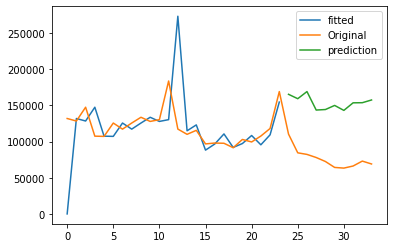

In [ ]:
train_prediction.plot(label = 'fitted', legend = True) 
ts_monthly['item_cnt_month'].plot(label = 'Original', legend = True) 
prediction.plot(label = 'prediction', legend = True) 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
0.9486081370449679
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train['item_cnt_month'], train_prediction))
train_r2 = r2_score(X_train['item_cnt_month'], train_prediction)
train_mae = mean_absolute_error(X_train['item_cnt_month'], train_prediction)
print('Train Score_RMSE: ')
print(trainScore)
print('Train Score_R2: ')
print(train_r2)
print('Train Score_MAE: ')
print(train_mae)


Train Score_RMSE: 
44709.229870286574
Train Score_R2: 
-3.170065839496287
Train Score_MAE: 
22542.148043341283


In [ ]:
testScore = math.sqrt(mean_squared_error(X_test['item_cnt_month'], prediction))
test_r2 = r2_score(X_test['item_cnt_month'], prediction)
test_mae = mean_absolute_error(X_test['item_cnt_month'], prediction)

print('Test Score_RMSE:')
print(testScore)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
78274.83642065343
Test Score_R2:
-33.9128083325201
Test Score_MAE:
77586.0479952159


# weekly sales for 3 years

In [ ]:
df_train1 = df_train[(df_train.date_block_num < 12)]
df_train2 = df_train[(df_train.date_block_num < 24)& (df_train.date_block_num >= 12)]
df_train3 = df_train[(df_train.date_block_num >= 24)]

df_train1['week']= df_train1['date'].dt.isocalendar().week
df_train2['week']= df_train2['date'].dt.isocalendar().week
df_train3['week']= df_train3['date'].dt.isocalendar().week

In [ ]:
max(df_train1['week'])

52

In [ ]:
max(df_train2['week'])

52

In [ ]:
max(df_train3['week'])

44

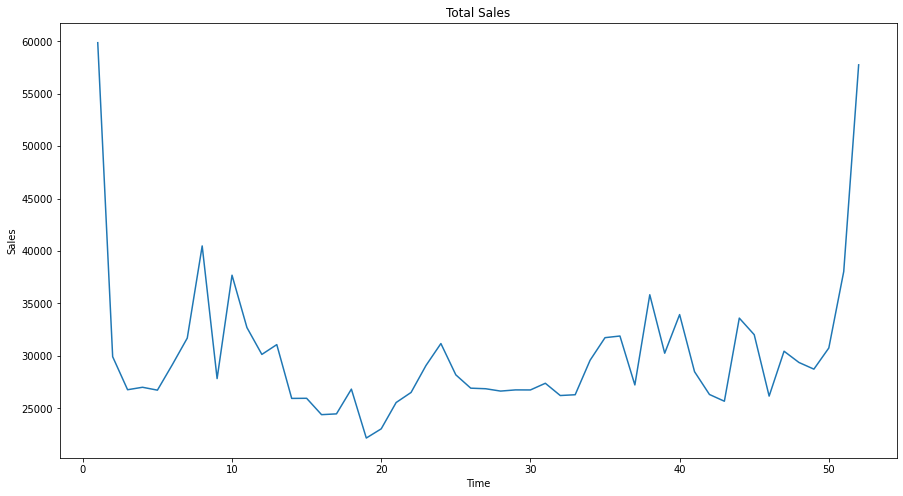

In [ ]:
ts_weekly_1=df_train1.groupby(["week"])["item_cnt_day"].sum()
ts_weekly_1.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts_weekly_1);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


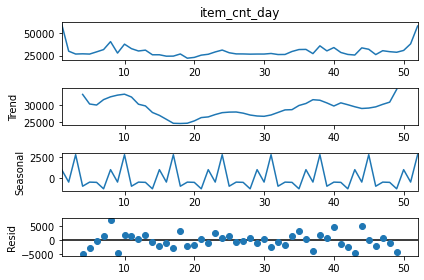

In [ ]:
decompose(ts_weekly_1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


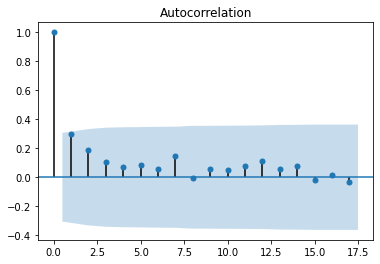

In [ ]:
ACF(ts_weekly_1)

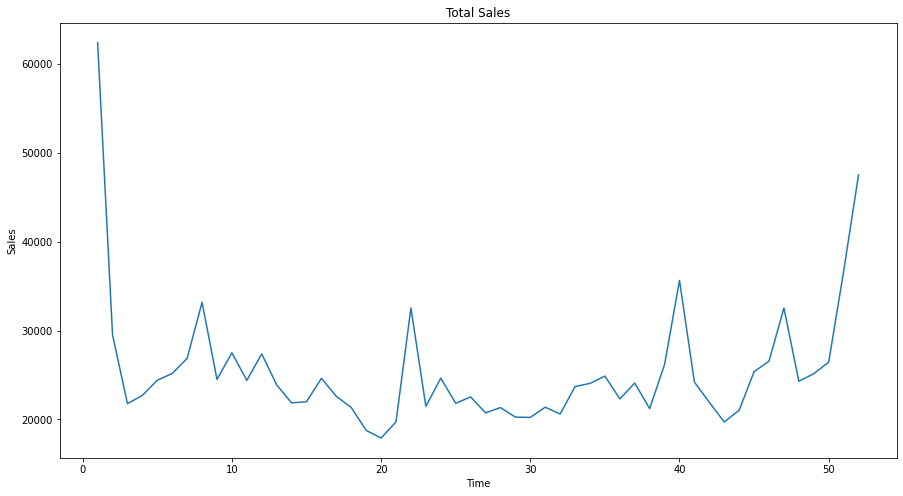

In [ ]:
ts_weekly_2=df_train2.groupby(["week"])["item_cnt_day"].sum()
ts_weekly_2.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts_weekly_2);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


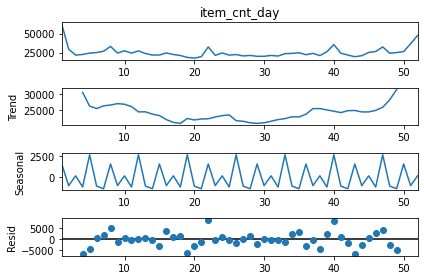

In [ ]:
decompose(ts_weekly_2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


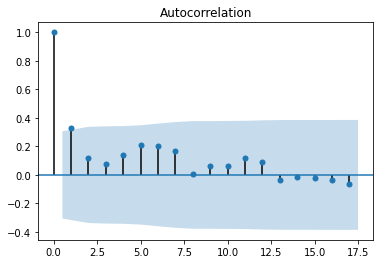

In [ ]:
ACF(ts_weekly_2)

In [ ]:
len(ts_weekly_1)

52

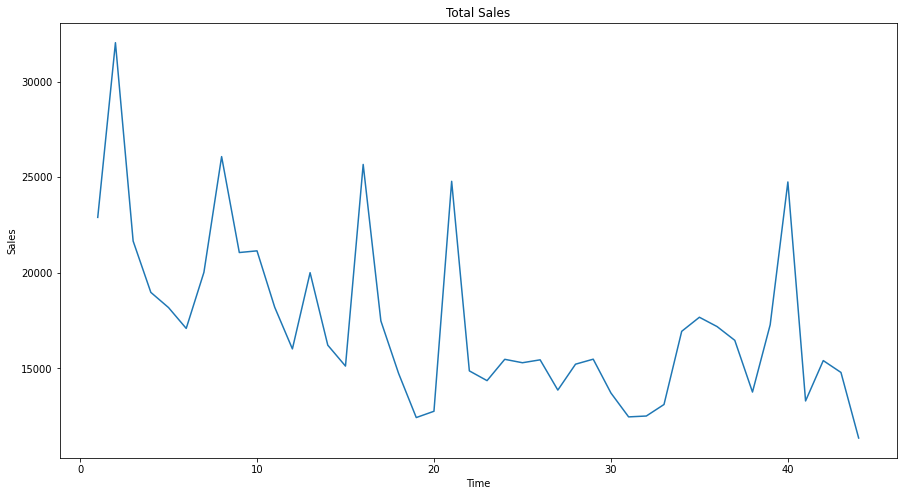

In [ ]:
ts_weekly_3=df_train3.groupby(["week"])["item_cnt_day"].sum()
ts_weekly_3.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts_weekly_3);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


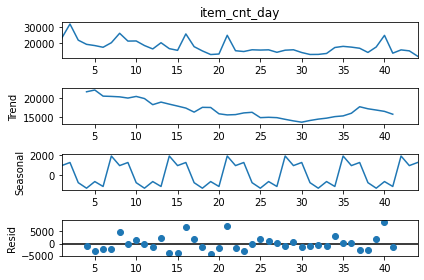

In [ ]:
decompose(ts_weekly_3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


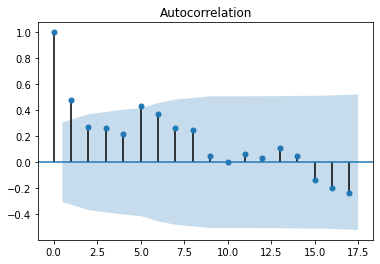

In [ ]:
ACF(ts_weekly_3)

#Aggregation
Restructure the df_train by item_id and shop_id pairs in a format suitable to combine it with the test_df

# creat weekly sales

In [ ]:
df_train2['week'] = df_train2['week'] + 52
df_train3['week'] = df_train3['week'] + 104

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train_weekly = pd.concat([df_train1, df_train2, df_train3], axis=0)

In [ ]:
df_train_weekly.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,week
2935844,2015-10-10,33,25,7409,299.0,1.0,145
2935845,2015-10-09,33,25,7460,299.0,1.0,145
2935846,2015-10-14,33,25,7459,349.0,1.0,146
2935847,2015-10-22,33,25,7440,299.0,1.0,147
2935848,2015-10-03,33,25,7460,299.0,1.0,144


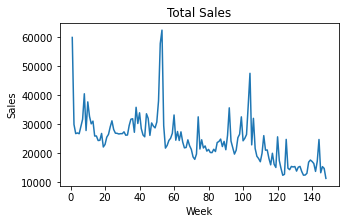

In [ ]:
sum_weekly = df_train_weekly.groupby(["week"])["item_cnt_day"].sum()
plt.figure(figsize=(5,3))
plt.title('Total Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.plot(sum_weekly);
# 52 + 52 + 44 = 148 weeks

In [ ]:
len(sum_weekly)

148

In [ ]:
sum_weekly = sum_weekly.reset_index()

In [ ]:
sum_weekly.columns

Index(['week', 'item_cnt_day'], dtype='object')

In [ ]:
sum_weekly.columns = ['week','item_cnt_week']

In [ ]:
sum_weekly.head()

,week,item_cnt_week
0,1,59875.0
1,2,29919.0
2,3,26767.0
3,4,27002.0
4,5,26727.0


# weekly sales decomposition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


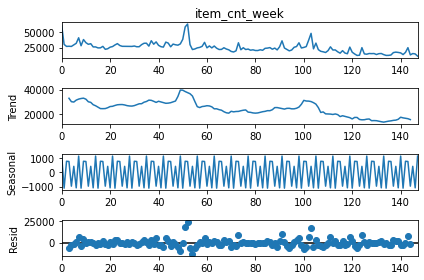

In [ ]:
decompose(sum_weekly['item_cnt_week'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


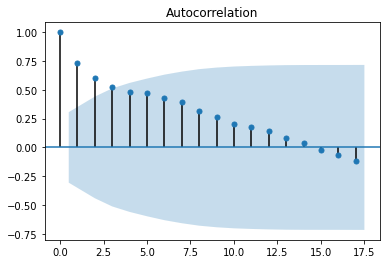

In [ ]:
ACF(sum_weekly['item_cnt_week'])

# check stationary for weekly sales

In [ ]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(sum_weekly['item_cnt_week'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  0.14866191972814924  if above 0.05, data is not stationary


# apply arima model on sum_weekly

In [ ]:
sum_weekly['item_cnt_week'][:104]

0      59875.0
1      29919.0
2      26767.0
3      27002.0
4      26727.0
        ...   
99     24292.0
100    25147.0
101    26449.0
102    36654.0
103    47529.0
Name: item_cnt_week, Length: 104, dtype: float64

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
# m, The period for seasonal differencing, m refers to the number of periods in each season.
arima_model = auto_arima(sum_weekly['item_cnt_week'][:104], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
# m, The period for seasonal differencing, m refers to the number of periods in each season.
arima_model = auto_arima(sum_weekly['item_cnt_week'][:104], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 52, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=1017.225, Time=0.83 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1012.675, Time=0.43 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1010.674, Time=1.86 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=1011.410, Time=2.40 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1013.901, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1012.676, Time=11.06 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=6.13 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=1010.609, Time=2.17 sec
 ARIMA(1,1,0)(0,1,2)[52]             : AIC=inf, Time=12.31 sec
 ARIMA(1,1,0)(1,1,2)[52]             : AIC=inf, Time=42.12 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=1008.951, Time=2.89 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=1010.925, Time=3.14 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=1010.846, Time=9.97 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1009.025, Time=1.29 sec
 ARIMA(0,1,0)(1,1,2)[52]       

In [ ]:
size = 104
X_train, X_test = sum_weekly[0:size], sum_weekly[size:len(sum_weekly)] 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['item_cnt_week'],  
                order = (0, 1, 0),  
                seasonal_order =(0, 1, 1, 52)) 
  
result = model.fit() 
result.summary() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        item_cnt_week   No. Observations:                  104
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -502.476
Date:                              Tue, 08 Dec 2020   AIC                           1008.951
Time:                                      22:32:45   BIC                           1012.815
Sample:                                           0   HQIC                          1010.428
                                              - 104                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L52      -0.2747      0.087     -3.147      0.002      -0.446      -0.104
sigma2      2.311e+07   2.15e-10   1.07e+17      0.000    2.31e+07    2.31e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.07   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.02   Prob(JB):                         0.31
Heteroskedasticity (H):               2.12   Skew:                            -0.20
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.33e+32. Standard errors may be unstable.
"""

In [ ]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 
train_prediction

0          0.000000
1      59875.000000
2      29919.000000
3      26767.000000
4      27002.000000
           ...     
99     31726.977904
100    23813.685573
101    26668.703783
102    31951.124785
103    51531.540212
Name: predicted_mean, Length: 104, dtype: float64

In [ ]:
#Test Prediction
start_index = len(X_train)
end_index = len(X_train)+43
prediction = result.predict(start_index, end_index)
prediction

104    62507.801208
105    32433.838102
106    26151.539065
107    26880.036949
108    28058.728230
109    29115.491402
110    30869.563185
111    37270.509985
112    28353.171974
113    32560.396446
114    29278.749037
115    30917.317322
116    28576.533279
117    26045.309549
118    26143.596570
119    27733.685754
120    26277.968099
121    25847.745009
122    23014.413272
123    22571.297671
124    24413.755825
125    33931.416154
126    26407.013166
127    29146.219389
128    26473.333530
129    26732.138236
130    25419.601493
131    25804.930860
132    25048.323186
133    25021.833876
134    25992.302303
135    25186.702581
136    27452.170676
137    28389.270584
138    29431.588524
139    27595.741095
140    27932.698986
141    27609.387843
142    30070.915292
143    37712.589044
144    28274.795479
145    26170.426534
146    24427.406618
147    27023.979008
Name: predicted_mean, dtype: float64

In [ ]:

#X_test['item_cnt_week'].plot(label = 'test', legend = True) 

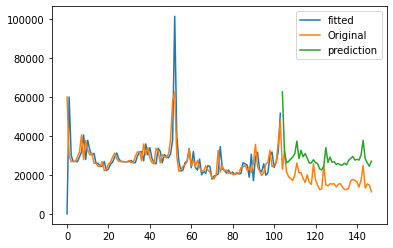

In [ ]:
train_prediction.plot(label = 'fitted', legend = True) 
sum_weekly['item_cnt_week'].plot(label = 'Original', legend = True) 
prediction.plot(label = 'prediction', legend = True) 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
0.9486081370449679
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train['item_cnt_week'], train_prediction))
train_r2 = r2_score(X_train['item_cnt_week'], train_prediction)
train_mae = mean_absolute_error(X_train['item_cnt_week'], train_prediction)
print('Train Score_RMSE: ')
print(trainScore)
print('Train Score_R2: ')
print(train_r2)
print('Train Score_MAE: ')
print(train_mae)


Train Score_RMSE: 
8932.998829439868
Train Score_R2: 
-0.44655369057983574
Train Score_MAE: 
4424.786090028675


In [ ]:
testScore = math.sqrt(mean_squared_error(X_test['item_cnt_week'], prediction))
test_r2 = r2_score(X_test['item_cnt_week'], prediction)
test_mae = mean_absolute_error(X_test['item_cnt_week'], prediction)

print('Test Score_RMSE:')
print(testScore)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
12656.100560101184
Test Score_R2:
-7.503980215113291
Test Score_MAE:
11361.857289638867


# pivot table for monthly sales

In [ ]:
#create a pivot table from train_sales by monthly sales
train_data_monthly = df_train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
# reset indices for easy manipulation
train_data_monthly.reset_index(inplace = True)
train_data_monthly.rename(columns = {'item_cnt_day': 'item_cnt_month'}, inplace= True)
train_data_monthly.head()

shop_id item_id item_cnt_month               ...                     
date_block_num                              0   1  2  3  4  ... 27 28 29 30 31 32 33
0                    0      30              0  31  0  0  0  ...  0  0  0  0  0  0  0
1                    0      31              0  11  0  0  0  ...  0  0  0  0  0  0  0
2                    0      32              6  10  0  0  0  ...  0  0  0  0  0  0  0
3                    0      33              3   3  0  0  0  ...  0  0  0  0  0  0  0
4                    0      35              1  14  0  0  0  ...  0  0  0  0  0  0  0

[5 rows x 36 columns]

# pivot table of weekly sales

In [ ]:
#create a pivot table from train_sales by monthly sales
train_data_weekly = df_train_weekly.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['week'],fill_value = 0,aggfunc='sum')
# reset indices for easy manipulation
train_data_weekly.reset_index(inplace = True)
train_data_weekly.rename(columns = {'item_cnt_day': 'item_cnt_weekly'}, inplace= True)
train_data_weekly.head()

shop_id item_id item_cnt_weekly              ...                            
week                               1  2  3  4  5  ... 142 143 144 145 146 147 148
0          0      30               0  0  0  0  0  ...   0   0   0   0   0   0   0
1          0      31               0  0  0  0  0  ...   0   0   0   0   0   0   0
2          0      32               2  0  0  3  1  ...   0   0   0   0   0   0   0
3          0      33               1  0  1  0  1  ...   0   0   0   0   0   0   0
4          0      35               0  0  0  0  4  ...   0   0   0   0   0   0   0

[5 rows x 150 columns]

In [ ]:
# merge train_data and test_df as to be suitable for prediction
all_data_monthly = pd.merge(df_test,train_data_monthly,on = ['item_id','shop_id'],how = 'left')
all_data_weekly = pd.merge(df_test,train_data_weekly,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
# fill all NaN values with 0
all_data_monthly.fillna(0,inplace = True)
all_data_weekly.fillna(0,inplace = True)

In [ ]:
all_data_monthly.head()

,ID,shop_id,item_id,"(item_cnt_month, 0)","(item_cnt_month, 1)","(item_cnt_month, 2)","(item_cnt_month, 3)","(item_cnt_month, 4)","(item_cnt_month, 5)","(item_cnt_month, 6)","(item_cnt_month, 7)","(item_cnt_month, 8)","(item_cnt_month, 9)","(item_cnt_month, 10)","(item_cnt_month, 11)","(item_cnt_month, 12)","(item_cnt_month, 13)","(item_cnt_month, 14)","(item_cnt_month, 15)","(item_cnt_month, 16)","(item_cnt_month, 17)","(item_cnt_month, 18)","(item_cnt_month, 19)","(item_cnt_month, 20)","(item_cnt_month, 21)","(item_cnt_month, 22)","(item_cnt_month, 23)","(item_cnt_month, 24)","(item_cnt_month, 25)","(item_cnt_month, 26)","(item_cnt_month, 27)","(item_cnt_month, 28)","(item_cnt_month, 29)","(item_cnt_month, 30)","(item_cnt_month, 31)","(item_cnt_month, 32)","(item_cnt_month, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_data_weekly.head()

,ID,shop_id,item_id,"(item_cnt_weekly, 1)","(item_cnt_weekly, 2)","(item_cnt_weekly, 3)","(item_cnt_weekly, 4)","(item_cnt_weekly, 5)","(item_cnt_weekly, 6)","(item_cnt_weekly, 7)","(item_cnt_weekly, 8)","(item_cnt_weekly, 9)","(item_cnt_weekly, 10)","(item_cnt_weekly, 11)","(item_cnt_weekly, 12)","(item_cnt_weekly, 13)","(item_cnt_weekly, 14)","(item_cnt_weekly, 15)","(item_cnt_weekly, 16)","(item_cnt_weekly, 17)","(item_cnt_weekly, 18)","(item_cnt_weekly, 19)","(item_cnt_weekly, 20)","(item_cnt_weekly, 21)","(item_cnt_weekly, 22)","(item_cnt_weekly, 23)","(item_cnt_weekly, 24)","(item_cnt_weekly, 25)","(item_cnt_weekly, 26)","(item_cnt_weekly, 27)","(item_cnt_weekly, 28)","(item_cnt_weekly, 29)","(item_cnt_weekly, 30)","(item_cnt_weekly, 31)","(item_cnt_weekly, 32)","(item_cnt_weekly, 33)","(item_cnt_weekly, 34)","(item_cnt_weekly, 35)","(item_cnt_weekly, 36)","(item_cnt_weekly, 37)",...,"(item_cnt_weekly, 109)","(item_cnt_weekly, 110)","(item_cnt_weekly, 111)","(item_cnt_weekly, 112)","(item_cnt_weekly, 113)","(item_cnt_weekly, 114)","(item_cnt_weekly, 115)","(item_cnt_weekly, 116)","(item_cnt_weekly, 117)","(item_cnt_weekly, 118)","(item_cnt_weekly, 119)","(item_cnt_weekly, 120)","(item_cnt_weekly, 121)","(item_cnt_weekly, 122)","(item_cnt_weekly, 123)","(item_cnt_weekly, 124)","(item_cnt_weekly, 125)","(item_cnt_weekly, 126)","(item_cnt_weekly, 127)","(item_cnt_weekly, 128)","(item_cnt_weekly, 129)","(item_cnt_weekly, 130)","(item_cnt_weekly, 131)","(item_cnt_weekly, 132)","(item_cnt_weekly, 133)","(item_cnt_weekly, 134)","(item_cnt_weekly, 135)","(item_cnt_weekly, 136)","(item_cnt_weekly, 137)","(item_cnt_weekly, 138)","(item_cnt_weekly, 139)","(item_cnt_weekly, 140)","(item_cnt_weekly, 141)","(item_cnt_weekly, 142)","(item_cnt_weekly, 143)","(item_cnt_weekly, 144)","(item_cnt_weekly, 145)","(item_cnt_weekly, 146)","(item_cnt_weekly, 147)","(item_cnt_weekly, 148)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Let us create the final train dataset for monthly.
Drop columns ID, shop_id, and item_id that are not sequence of observation over a time period. Retain only observations that can be used in creating time series lag features, i.e. features at previous levels to help predicting outcome at a future time.

In [ ]:
all_data_monthly.drop(['ID','shop_id','item_id'],inplace = True, axis = 1)

In [ ]:
all_data_monthly.head()

,"(item_cnt_month, 0)","(item_cnt_month, 1)","(item_cnt_month, 2)","(item_cnt_month, 3)","(item_cnt_month, 4)","(item_cnt_month, 5)","(item_cnt_month, 6)","(item_cnt_month, 7)","(item_cnt_month, 8)","(item_cnt_month, 9)","(item_cnt_month, 10)","(item_cnt_month, 11)","(item_cnt_month, 12)","(item_cnt_month, 13)","(item_cnt_month, 14)","(item_cnt_month, 15)","(item_cnt_month, 16)","(item_cnt_month, 17)","(item_cnt_month, 18)","(item_cnt_month, 19)","(item_cnt_month, 20)","(item_cnt_month, 21)","(item_cnt_month, 22)","(item_cnt_month, 23)","(item_cnt_month, 24)","(item_cnt_month, 25)","(item_cnt_month, 26)","(item_cnt_month, 27)","(item_cnt_month, 28)","(item_cnt_month, 29)","(item_cnt_month, 30)","(item_cnt_month, 31)","(item_cnt_month, 32)","(item_cnt_month, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/items.csv')

In [ ]:
data[:1]

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40


In [ ]:
 import numpy as np
 X_train_monthly = np.expand_dims(data[:1].values[:,:-2],axis = 2)

In [ ]:
data[:1].values

array([['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D', 0, 40]], dtype=object)

In [ ]:
X_train_monthly

array([[['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D']]], dtype=object)

In [ ]:
y = data[:1].values[:,-2:-1]
y

array([[0]], dtype=object)

In [ ]:
test = np.expand_dims(data[:1].values[:,1:-1],axis = 2)
test

array([[[0]]], dtype=object)

In [ ]:
y_test = data[:1].values[:,-1]
y_test

In [ ]:
# X we will keep all columns execpt the last one 
X_train_monthly = np.expand_dims(all_data_monthly.values[:,:-2],axis = 2)
# the last column is our label
y_train_monthly = all_data_monthly.values[:,-2:-1]

# for test we keep all the columns execpt the first one
X_test_monthly = np.expand_dims(all_data_monthly.values[:,1:-1],axis = 2)
y_test_monthly = all_data_monthly.values[:,-1]
# lets have a look on the shape 
print(X_train_monthly.shape,y_train_monthly.shape,X_test_monthly.shape, y_test_monthly.shape)


(214200, 32, 1) (214200, 1) (214200, 32, 1) (214200,)


# apply LSTM model

In [ ]:
# importing libraries required for our model
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# our defining our model 
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train_monthly.shape[1], X_train_monthly.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(X_train_monthly,y_train_monthly,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 34s 637ms/step - loss: 6.0020 - mean_squared_error: 6.0020
Epoch 2/10
53/53 [==============================] - 34s 636ms/step - loss: 5.7216 - mean_squared_error: 5.7216
Epoch 3/10
53/53 [==============================] - 37s 701ms/step - loss: 5.5730 - mean_squared_error: 5.5730
Epoch 4/10
53/53 [==============================] - 34s 633ms/step - loss: 5.4741 - mean_squared_error: 5.4741
Epoch 5/10
53/53 [==============================] - 33s 632ms/step - loss: 5.3592 - mean_squared_error: 5.3592
Epoch 6/10
53/53 [==============================] - 35s 655ms/step - loss: 5.3530 - mean_squared_error: 5.3530
Epoch 7/10
53/53 [==============================] - 34s 637ms/step - loss: 5.2915 - mean_squared_error: 5.2915
Epoch 8/10
53/53 [==============================] - 33s 628ms/step - loss: 5.2092 - mean_squared_error: 5.2092
Epoch 9/10
53/53 [==============================] - 33s 625ms/step - loss: 5.2078 - mean_squared_error: 5.2078
E

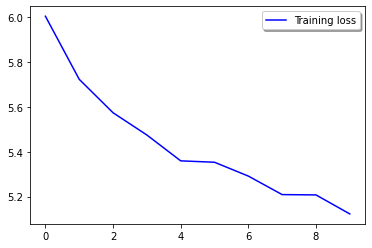

In [ ]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
y_predict = model_lstm.predict(X_test_monthly)

# result of LSTM model(monthly)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

test_rmse = math.sqrt(mean_squared_error(y_test_monthly, y_predict))
test_r2 = r2_score(y_test_monthly, y_predict)
test_mae = mean_absolute_error(y_test_monthly, y_predict)

print('Test Score_RMSE:')
print(test_rmse)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
2.4689664558630273
Test Score_R2:
0.14824251388707255
Test Score_MAE:
0.36879874218752684


# apply CNN model on monthly_sale

In [ ]:
adam = optimizers.Adam()
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_monthly.shape[1], X_train_monthly.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 31, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                48050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 48,293
Trainable params: 48,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_history = model_cnn.fit(X_train_monthly, y_train_monthly, epochs=10, verbose=2)

Epoch 1/10
6694/6694 - 15s - loss: 5.1457
Epoch 2/10
6694/6694 - 16s - loss: 3.5638
Epoch 3/10
6694/6694 - 15s - loss: 3.1914
Epoch 4/10
6694/6694 - 14s - loss: 2.8779
Epoch 5/10
6694/6694 - 15s - loss: 2.5179
Epoch 6/10
6694/6694 - 15s - loss: 2.3344
Epoch 7/10
6694/6694 - 15s - loss: 2.9285
Epoch 8/10
6694/6694 - 16s - loss: 2.5501
Epoch 9/10
6694/6694 - 14s - loss: 2.5029
Epoch 10/10
6694/6694 - 14s - loss: 2.9098


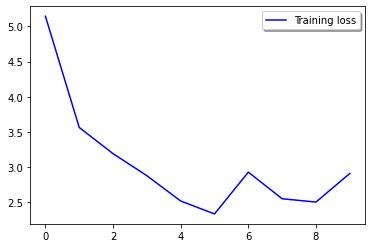

In [ ]:
plt.plot(cnn_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
y_predict = model_cnn.predict(X_test_monthly)

# result of CNN model(monthly)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

test_rmse = math.sqrt(mean_squared_error(y_test_monthly, y_predict))
test_r2 = r2_score(y_test_monthly, y_predict)
test_mae = mean_absolute_error(y_test_monthly, y_predict)

print('Test Score_RMSE:')
print(test_rmse)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
1.8256345676675703
Test Score_R2:
0.534292447620214
Test Score_MAE:
0.4639810850207601


# creat the final train dataset for weekly

In [ ]:
all_data_weekly.drop(['ID','shop_id','item_id'],inplace = True, axis = 1)

In [ ]:
all_data_weekly.head()

,"(item_cnt_weekly, 1)","(item_cnt_weekly, 2)","(item_cnt_weekly, 3)","(item_cnt_weekly, 4)","(item_cnt_weekly, 5)","(item_cnt_weekly, 6)","(item_cnt_weekly, 7)","(item_cnt_weekly, 8)","(item_cnt_weekly, 9)","(item_cnt_weekly, 10)","(item_cnt_weekly, 11)","(item_cnt_weekly, 12)","(item_cnt_weekly, 13)","(item_cnt_weekly, 14)","(item_cnt_weekly, 15)","(item_cnt_weekly, 16)","(item_cnt_weekly, 17)","(item_cnt_weekly, 18)","(item_cnt_weekly, 19)","(item_cnt_weekly, 20)","(item_cnt_weekly, 21)","(item_cnt_weekly, 22)","(item_cnt_weekly, 23)","(item_cnt_weekly, 24)","(item_cnt_weekly, 25)","(item_cnt_weekly, 26)","(item_cnt_weekly, 27)","(item_cnt_weekly, 28)","(item_cnt_weekly, 29)","(item_cnt_weekly, 30)","(item_cnt_weekly, 31)","(item_cnt_weekly, 32)","(item_cnt_weekly, 33)","(item_cnt_weekly, 34)","(item_cnt_weekly, 35)","(item_cnt_weekly, 36)","(item_cnt_weekly, 37)","(item_cnt_weekly, 38)","(item_cnt_weekly, 39)","(item_cnt_weekly, 40)",...,"(item_cnt_weekly, 109)","(item_cnt_weekly, 110)","(item_cnt_weekly, 111)","(item_cnt_weekly, 112)","(item_cnt_weekly, 113)","(item_cnt_weekly, 114)","(item_cnt_weekly, 115)","(item_cnt_weekly, 116)","(item_cnt_weekly, 117)","(item_cnt_weekly, 118)","(item_cnt_weekly, 119)","(item_cnt_weekly, 120)","(item_cnt_weekly, 121)","(item_cnt_weekly, 122)","(item_cnt_weekly, 123)","(item_cnt_weekly, 124)","(item_cnt_weekly, 125)","(item_cnt_weekly, 126)","(item_cnt_weekly, 127)","(item_cnt_weekly, 128)","(item_cnt_weekly, 129)","(item_cnt_weekly, 130)","(item_cnt_weekly, 131)","(item_cnt_weekly, 132)","(item_cnt_weekly, 133)","(item_cnt_weekly, 134)","(item_cnt_weekly, 135)","(item_cnt_weekly, 136)","(item_cnt_weekly, 137)","(item_cnt_weekly, 138)","(item_cnt_weekly, 139)","(item_cnt_weekly, 140)","(item_cnt_weekly, 141)","(item_cnt_weekly, 142)","(item_cnt_weekly, 143)","(item_cnt_weekly, 144)","(item_cnt_weekly, 145)","(item_cnt_weekly, 146)","(item_cnt_weekly, 147)","(item_cnt_weekly, 148)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X we will keep all columns execpt the last one 
X_train_weekly = np.expand_dims(all_data_weekly.values[:,:-2],axis = 2)
# the last column is our label
y_train_weekly = all_data_weekly.values[:,-2:-1]

# for test we keep all the columns execpt the first one
X_test_weekly = np.expand_dims(all_data_weekly.values[:,1:-1],axis = 2)
y_test_weekly = all_data_weekly.values[:,-1]
# lets have a look on the shape 
print(X_train_weekly.shape,y_train_weekly.shape,X_test_weekly.shape, y_test_weekly.shape)


(214200, 146, 1) (214200, 1) (214200, 146, 1) (214200,)


# apply LSTM on weekly

In [ ]:
# our defining our model 
model_lstm1 = Sequential()
model_lstm1.add(LSTM(units = 64,input_shape = (X_train_weekly.shape[1], X_train_weekly.shape[2])))
model_lstm1.add(Dropout(0.4))
model_lstm1.add(Dense(1))

model_lstm1.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm1 = model_lstm1.fit(X_train_weekly,y_train_weekly,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 143s 3s/step - loss: 0.4314 - mean_squared_error: 0.4314
Epoch 2/10
53/53 [==============================] - 147s 3s/step - loss: 0.4094 - mean_squared_error: 0.4094
Epoch 3/10
53/53 [==============================] - 146s 3s/step - loss: 0.3928 - mean_squared_error: 0.3928
Epoch 4/10
53/53 [==============================] - 147s 3s/step - loss: 0.3875 - mean_squared_error: 0.3875
Epoch 5/10
53/53 [==============================] - 143s 3s/step - loss: 0.3753 - mean_squared_error: 0.3753
Epoch 6/10
53/53 [==============================] - 146s 3s/step - loss: 0.3725 - mean_squared_error: 0.3725
Epoch 7/10
53/53 [==============================] - 144s 3s/step - loss: 0.3670 - mean_squared_error: 0.3670
Epoch 8/10
53/53 [==============================] - 146s 3s/step - loss: 0.3663 - mean_squared_error: 0.3663
Epoch 9/10
53/53 [==============================] - 145s 3s/step - loss: 0.3680 - mean_squared_error: 0.3680
Epoch 10/10
53/53 [

In [ ]:
y_predict_weekly = model_lstm1.predict(X_test_weekly)

# result of LSTM weekly

In [ ]:
test_rmse = math.sqrt(mean_squared_error(y_test_weekly, y_predict_weekly))
test_r2 = r2_score(y_test_weekly, y_predict_weekly)
test_mae = mean_absolute_error(y_test_weekly, y_predict_weekly)

print('Test Score_RMSE:')
print(test_rmse)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
0.36889351185022884
Test Score_R2:
0.35093728741689734
Test Score_MAE:
0.08454901621307409


# apply CNN on weekly

In [ ]:
model_cnn1 = Sequential()
model_cnn1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_weekly.shape[1], X_train_weekly.shape[2])))
model_cnn1.add(MaxPooling1D(pool_size=2))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(50, activation='relu'))
model_cnn1.add(Dense(1))
model_cnn1.compile(loss='mse', optimizer=adam)
model_cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 145, 64)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 72, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 230,693
Trainable params: 230,693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_history1 = model_cnn1.fit(X_train_weekly, y_train_weekly, epochs=10, verbose=2)

Epoch 1/10
6694/6694 - 48s - loss: 0.4147
Epoch 2/10
6694/6694 - 47s - loss: 0.3082
Epoch 3/10
6694/6694 - 47s - loss: 0.3106
Epoch 4/10
6694/6694 - 47s - loss: 0.3124
Epoch 5/10
6694/6694 - 48s - loss: 0.3108
Epoch 6/10
6694/6694 - 46s - loss: 0.3131
Epoch 7/10
6694/6694 - 46s - loss: 0.2760
Epoch 8/10
6694/6694 - 46s - loss: 0.3215
Epoch 9/10
6694/6694 - 47s - loss: 0.2683
Epoch 10/10
6694/6694 - 48s - loss: 0.2533


In [ ]:
y_predict_weekly_cnn = model_cnn1.predict(X_test_weekly)

In [ ]:
max(y_predict_weekly_cnn)

array([69.382996], dtype=float32)

# result of CNN weekly

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

test_rmse = math.sqrt(mean_squared_error(y_test_weekly, y_predict_weekly_cnn))
test_r2 = r2_score(y_test_weekly, y_predict_weekly_cnn)
test_mae = mean_absolute_error(y_test_weekly, y_predict_weekly_cnn)

print('Test Score_RMSE:')
print(test_rmse)
print('Test Score_R2:')
print(test_r2)
print('Test Score_MAE:')
print(test_mae)

Test Score_RMSE:
0.3409564204876282
Test Score_R2:
0.44552448535680245
Test Score_MAE:
0.08756470895865384
